<font size="6"> III. EDA</font>

In [27]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer 

from textblob import TextBlob, Word, Blobber



In [4]:
df = pd.read_csv("./dataframe", keep_default_na = False, index_col = 0) #read in data frame
df.rename(columns={"0": "category"}, inplace = True) # change column name of binary class

In [5]:
df

,title,created_utc,selftext,subreddit,author,media_only,permalink,textsum,category
0,Gorgeous NASA X-ray images of universe look li...,1602008143,,astrophysics,Sorin61,False,/r/astrophysics/comments/j6aaro/gorgeous_nasa_...,Gorgeous NASA X-ray images of universe look li...,0
1,Can someone please explain how to calculate th...,1602006466,,astrophysics,astrojosue,False,/r/astrophysics/comments/j69qx5/can_someone_pl...,Can someone please explain how to calculate th...,0
2,Can someone explain formula to calculate the m...,1602000784,,astrophysics,astrojosue,False,/r/astrophysics/comments/j67wz2/can_someone_ex...,Can someone explain formula to calculate the m...,0
3,Can someone elaborate?,1601999794,,astrophysics,astrojosue,False,/r/astrophysics/comments/j67lw5/can_someone_el...,Can someone elaborate?,0
4,Maybe astrophysics is not for me! Just watched...,1601987660,,astrophysics,Yugitonii,False,/r/astrophysics/comments/j6485v/maybe_astrophy...,Maybe astrophysics is not for me! Just watched...,0
...,...,...,...,...,...,...,...,...,...
995,Copper atoms,1535529373,,ParticlePhysics,waitfof,False,/r/ParticlePhysics/comments/9b79pk/copper_atoms/,Copper atoms,1
996,ATLAS &amp; CMS H→bb̅ observation papers avail...,1535437840,"ATLAS: ""Observation of H→bb̅ decays and VH pro...",ParticlePhysics,dukwon,False,/r/ParticlePhysics/comments/9awkpl/atlas_cms_h...,ATLAS &amp; CMS H→bb̅ observation papers avail...,1
997,As part of the Perimeter Institute’s ‘My Favou...,1535220159,,ParticlePhysics,IPPP_Durham,False,/r/ParticlePhysics/comments/9a8rex/as_part_of_...,As part of the Perimeter Institute’s ‘My Favou...,1
998,Dark Matter Detection with SuperCDMS,1535112573,,ParticlePhysics,IPPP_Durham,False,/r/ParticlePhysics/comments/99wuwf/dark_matter...,Dark Matter Detection with SuperCDMS,1


In [17]:
cvect = CountVectorizer(stop_words =  "english")  

df1 = df["textsum"]
df2 = cvect.fit_transform(df1)

df3 = pd.DataFrame(df2.toarray(), columns = cvect.get_feature_names())


In [21]:
df3.sum().nlargest(20) #twenty most prevalent words

particle     285
physics      259
time         192
quantum      175
matter       172
black        169
like         168
just         163
know         144
space        140
mass         129
universe     129
light        128
does         125
particles    122
field        118
https        118
hole         116
wave         111
energy        98
dtype: int64

NameError: name 'plt' is not defined

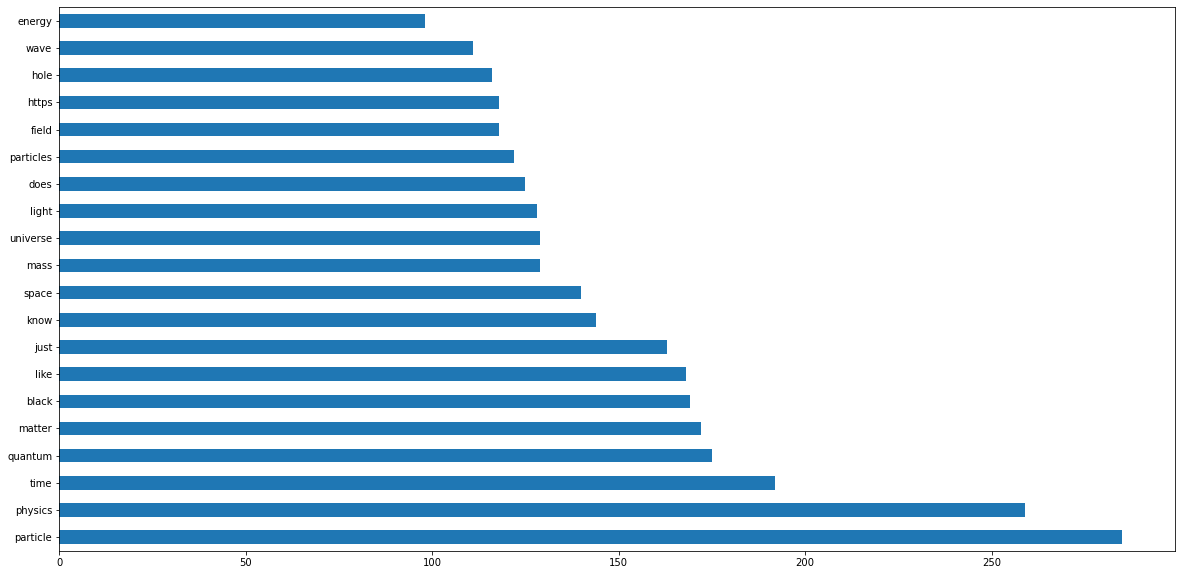

In [22]:
df3.sum().nlargest(20).plot(kind='barh', figsize=(20,10)); plt.bar() 

In [25]:
df3.sum().nsmallest(20)

00000001            1
00000029979246      1
000vnđ              1
02                  1
04                  1
05                  1
08238               1
08242               1
09242               1
1000                1
1000000000000000    1
1000mph             1
10098               1
10459               1
106                 1
120                 1
125                 1
12566               1
133                 1
14228               1
dtype: int64

In [30]:
def sentiment_analysis(text):
    blob = TextBlob(text)
    return blob.polarity
    # function that outputs sentiment of text

In [32]:
df["polarity"] = df["textsum"].apply(sentiment_analysis)

In [33]:
df

,title,created_utc,selftext,subreddit,author,media_only,permalink,textsum,category,polarity
0,Gorgeous NASA X-ray images of universe look li...,1602008143,,astrophysics,Sorin61,False,/r/astrophysics/comments/j6aaro/gorgeous_nasa_...,Gorgeous NASA X-ray images of universe look li...,0,0.700000
1,Can someone please explain how to calculate th...,1602006466,,astrophysics,astrojosue,False,/r/astrophysics/comments/j69qx5/can_someone_pl...,Can someone please explain how to calculate th...,0,-0.150000
2,Can someone explain formula to calculate the m...,1602000784,,astrophysics,astrojosue,False,/r/astrophysics/comments/j67wz2/can_someone_ex...,Can someone explain formula to calculate the m...,0,0.000000
3,Can someone elaborate?,1601999794,,astrophysics,astrojosue,False,/r/astrophysics/comments/j67lw5/can_someone_el...,Can someone elaborate?,0,0.500000
4,Maybe astrophysics is not for me! Just watched...,1601987660,,astrophysics,Yugitonii,False,/r/astrophysics/comments/j6485v/maybe_astrophy...,Maybe astrophysics is not for me! Just watched...,0,0.142857
...,...,...,...,...,...,...,...,...,...,...
995,Copper atoms,1535529373,,ParticlePhysics,waitfof,False,/r/ParticlePhysics/comments/9b79pk/copper_atoms/,Copper atoms,1,0.000000
996,ATLAS &amp; CMS H→bb̅ observation papers avail...,1535437840,"ATLAS: ""Observation of H→bb̅ decays and VH pro...",ParticlePhysics,dukwon,False,/r/ParticlePhysics/comments/9awkpl/atlas_cms_h...,ATLAS &amp; CMS H→bb̅ observation papers avail...,1,0.400000
997,As part of the Perimeter Institute’s ‘My Favou...,1535220159,,ParticlePhysics,IPPP_Durham,False,/r/ParticlePhysics/comments/9a8rex/as_part_of_...,As part of the Perimeter Institute’s ‘My Favou...,1,0.000000
998,Dark Matter Detection with SuperCDMS,1535112573,,ParticlePhysics,IPPP_Durham,False,/r/ParticlePhysics/comments/99wuwf/dark_matter...,Dark Matter Detection with SuperCDMS,1,-0.150000


In [35]:
print(df["polarity"][0:500].mean()) #mean polarity of astrophysics text

0.08272990717421404


In [42]:
df["polarity"][500:999].mean() #mean of polarity of particle physics text 

0.08686597286373601

0.08272990717421404

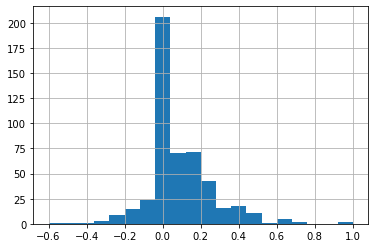

In [44]:
hist = df["polarity"][500:999].hist(bins=20)

df["polarity"][0:500].mean()

#histogram of polarity scores for astrophysics

0.08686597286373601

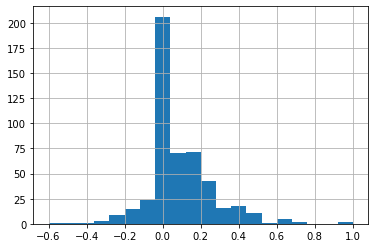

In [47]:
hist = df["polarity"][500:999].hist(bins=20)
df["polarity"][500:999].mean()

#histogram of particle physics polarity scores 

The histograms for both Astrophysics and polarity score are approximately normally distributed. The average for both groups are very low, which makes sense. 